In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load digits dataset
digits = load_digits()
X = digits.data  # shape: (1797, 64)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor), batch_size=64, shuffle=False)

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

In [4]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 50
model.train()

for epoch in range(num_epochs):
    total_loss = 0
    for batch, in train_loader:
        batch = batch.to(device)
        output = model(batch)
        loss = criterion(output, batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

Epoch [1/50], Loss: 22.5689
Epoch [2/50], Loss: 21.7635
Epoch [3/50], Loss: 20.2965
Epoch [4/50], Loss: 17.6427
Epoch [5/50], Loss: 15.6000
Epoch [6/50], Loss: 14.0364
Epoch [7/50], Loss: 12.8813
Epoch [8/50], Loss: 12.1527
Epoch [9/50], Loss: 11.6105
Epoch [10/50], Loss: 11.7447
Epoch [11/50], Loss: 10.8643
Epoch [12/50], Loss: 10.5103
Epoch [13/50], Loss: 10.2301
Epoch [14/50], Loss: 10.0103
Epoch [15/50], Loss: 9.9349
Epoch [16/50], Loss: 9.9738
Epoch [17/50], Loss: 9.4217
Epoch [18/50], Loss: 9.1224
Epoch [19/50], Loss: 9.1387
Epoch [20/50], Loss: 8.7833
Epoch [21/50], Loss: 8.6224
Epoch [22/50], Loss: 8.6109
Epoch [23/50], Loss: 8.3851
Epoch [24/50], Loss: 8.3607
Epoch [25/50], Loss: 8.0663
Epoch [26/50], Loss: 7.9475
Epoch [27/50], Loss: 7.8720
Epoch [28/50], Loss: 7.7772
Epoch [29/50], Loss: 7.6474
Epoch [30/50], Loss: 7.5345
Epoch [31/50], Loss: 7.4335
Epoch [32/50], Loss: 7.3484
Epoch [33/50], Loss: 7.3063
Epoch [34/50], Loss: 7.3443
Epoch [35/50], Loss: 7.2243
Epoch [36/50], 

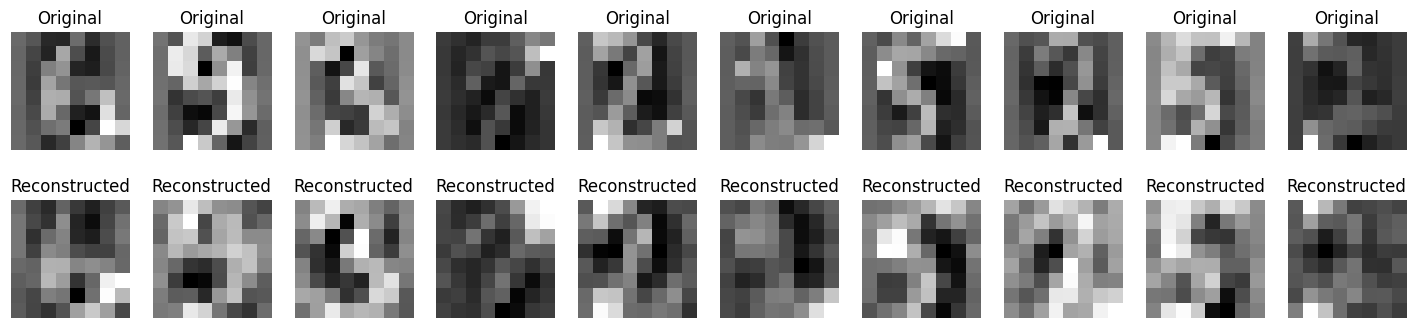

In [5]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    reconstructed = model(X_test_tensor.to(device)).cpu()

# Show original vs reconstructed images
n = 10
plt.figure(figsize=(18, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_tensor[i].reshape(8, 8), cmap='gray')
    ax.set_title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].detach().numpy().reshape(8, 8), cmap='gray')
    ax.set_title("Reconstructed")
    plt.axis("off")
plt.show()